# Python training UGA 2017

**A training to acquire strong basis in Python to use it efficiently**

Pierre Augier (LEGI), Cyrille Bonamy (LEGI), Eric Maldonado (Irstea), Franck Thollard (ISTerre), Oliver Henriot (GRICAD), Christophe Picard (LJK), Loïc Huder (ISTerre)

# Python scientific ecosystem
# Data plotting and manipulation with NumPy, SciPy and Matplotlib

In this part, you will be asked to generate various plots by using electrocardiogram data provided by SciPy. Some pointers will be given for the asked tasks but you are expected to make extensive use of:
- [NumPy docs](https://docs.scipy.org/doc/numpy/reference/index.html)
- [SciPy docs](https://docs.scipy.org/doc/)
- [Matplotlib docs](https://matplotlib.org/contents.html)
- Queries on your favorite search engine

The ECG data can be accessed through `scipy.misc`: 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc

ecg_data = scipy.misc.electrocardiogram()

`ecg_data` is a 1D NumPy array containing the values of the ECG signal (in mV) that were recorded at 360 Hz (https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html).

## Step 1 : Explore the data
1. Extract the number of samples, the mean and the minimum and maximum values of the ECG signal.
2. Take a look at the data by doing a simple line plot. Change the limits of the plot to have a meaningful sample plot (ex: display between sample 1000 and sample 2000).

## Step 2 : Improve the figure
The plot that we generated is a little barebone so let's improve it a bit.
1. Knowing that the sampling frequency is 360 Hz, generate an array `time` that will give the seconds elapsed since the beginning of the ECG record.
2. Use this array `time` to plot the ECG signal again but with respect to time now. Again adjust the limits of your plot to have something meaningful to look at.
3. Put labels on the axes (ex: time (s) for X and ECG (mV) for Y).
3. Add *small* circle markers to your plot to pinpoint the sampling points.

## Step 3 : Some data manipulation
Let's now try to combine data manipulation with the plots.
1. Find the time of the maximum signal of the ECG.
2. Plot the ECG signal around this maximum (2 seconds before and 2 seconds after for example). Put a dashed red line at the maxmimum location (see `vlines`).
3. Do the same for the minimum signal (but with a dashed green line this time).
4. Put the two plots side-to-side in the same figure with `subplots`. BONUS: try to have the Y axis shared in the subplots.

## Step 4 : Histograms
We worked exclusively with line plots until now so let's try something else.
1. Plot the histogram of the data (see `hist` matplotlib). 
2. Change the `bins` args so that we have one bar for every range of 0.2 between -4 and 4.
3. Recover the data from the histogram to plot yellow crosses at the top of the histogram bars.
4. use `scipy.optimize.curve_fit` to do a Gaussian fit of the obtained distribution. Plot the fit on the histogram with a black line. BONUS: Try to fit by a Lorentzian instead.
5. Add labels to your plot to have a legend.

## Go further
If you still crave things to do, here are possible bonus exercices:
- Plot multiple time windows of the ECG on the same plot with different colors/labels.
- Try to find the peaks of the ECG (ex: compute the derivative with `scipy.signal.savgol_filter`) and plot dots on them.
- Try to compute the FFT of the data (`scipy.fftpack`) to find dominant frequencies.

# Proposed solutions

## Step 1 : Explore the data
1. Extract the number of samples, the mean and the minimum and maximum values of the ECG signal.
2. Take a look at the data by doing a simple line plot. Change the limits of the plot to have a meaningful sample plot (ex: display between sample 1000 and sample 2000).

In [2]:
nb_samples = len(ecg_data) # Or ecg_data.size as it is 1D
print(f'ecg_data has {nb_samples} samples (min: {np.min(ecg_data)}, max: {np.max(ecg_data)}). Mean: {np.mean(ecg_data)}.')

ecg_data has 108000 samples (min: -3.485, max: 3.65). Mean: -0.16510875


(1000, 2000)

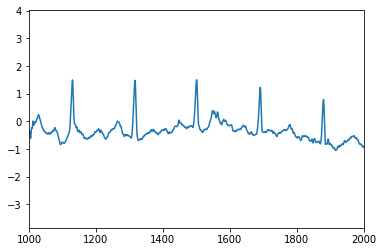

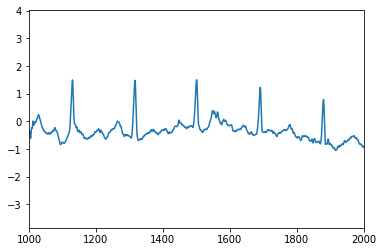

In [3]:
plt.figure()
plt.plot(ecg_data)
plt.xlim(1000, 2000)
# OR
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(ecg_data)
ax.set_xlim(1000, 2000)

## Step 2 : Improve the figure
The plot that we generated is a little barebone so let's improve it a bit.
1. Knowing that the sampling frequency is 360 Hz, generate an array `time` that will give the seconds elapsed since the beginning of the ECG record.
2. Use this array `time` to plot the ECG signal again but with respect to time now. Again adjust the limits of your plot to have something meaningful to look at.
3. Put labels on the axes (ex: time (s) for X and ECG (mV) for Y).
3. Add *small* circle markers to your plot to pinpoint the sampling points.

Text(0, 0.5, 'ECG (mV)')

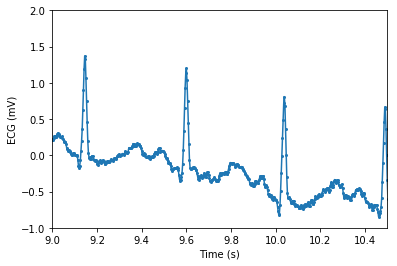

In [4]:
sampling_frequency = 360.
time = np.arange(nb_samples)/sampling_frequency
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(time, ecg_data, marker='o', markersize=2)
ax.set_xlim(9, 10.5)
ax.set_ylim(-1, 2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ECG (mV)')

## Step 3 : Some data manipulation
Let's now try to combine data manipulation with the plots.
1. Find the time of the maximum signal of the ECG.
2. Plot the ECG signal around this maximum (2 seconds before and 2 seconds after for example). Put a dashed red line at the maxmimum location (see `vlines`).
3. Do the same for the minimum signal (but with a dashed green line this time)
4. Put the two plots side-to-side in the same figure with `subplots`. (BONUS: try to have the Y axis shared in the subplots)

Time of maximum is 42.516666666666666
Time of minimum is 99.49722222222222


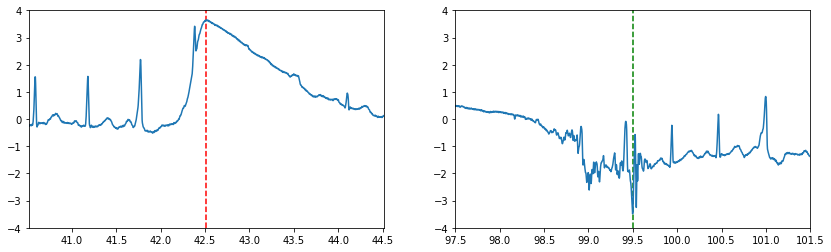

In [5]:
i_max = np.argmax(ecg_data)
t_max = time[i_max]
print(f'Time of maximum is {t_max}')
dt = 2.
f = plt.figure(figsize=(14, 4))
ax_max = f.add_subplot(121)
ax_max.plot(time, ecg_data)
ax_max.set_xlim(t_max - dt, t_max + dt)
ax_max.vlines(t_max, -4, 4, color='red', linestyle='--')
ax_max.set_ylim(-4, 4)

i_min = np.argmin(ecg_data)
t_min = time[i_min]
print(f'Time of minimum is {t_min}')
ax_min = f.add_subplot(122, sharey=ax_max)
ax_min.plot(time, ecg_data)
ax_min.set_xlim(t_min - dt, t_min + dt)
ax_min.vlines(t_min, -4, 4, color='green', linestyle='--')

## Step 4 : Histograms
We worked exclusively with line plots until now so let's try something else.
1. Plot the histogram of the data (see `hist` matplotlib). 
2. Change the `bins` args so that we have one bar for every range of 0.2 between -4 and 4.
3. Recover the data from the histogram to plot yellow crosses at the top of the histogram bars.
4. use `scipy.optimize.curve_fit` to do a Gaussian fit of the obtained distribution. Plot the fit on the histogram with a black line. BONUS: Try to fit by a Lorentzian instead.
5. Add labels to your plot to have a legend.

[ 2.12147050e+04 -2.42983901e-01  5.00728220e-01] [[ 7.00972367e+05  9.08436030e-08 -1.10302477e+01]
 [ 9.08436030e-08  2.60351979e-04 -1.27604898e-12]
 [-1.10302477e+01 -1.27604898e-12  5.20703973e-04]]
[ 2.36984903e+04 -2.43458176e-01  3.07113825e-01] [[ 2.26389471e+05 -7.31701495e-02  2.95517475e+00]
 [-7.31701495e-02  3.75995236e-05 -2.38886877e-06]
 [ 2.95517475e+00 -2.38886877e-06  7.67656344e-05]]


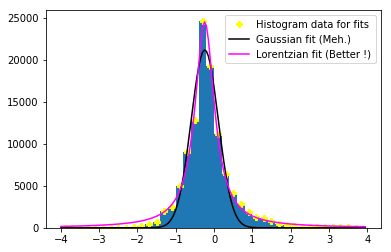

In [6]:
delta = 0.2
f = plt.figure()
ax = f.add_subplot(111)
hist_data, bins, patch_lists = ax.hist(ecg_data, bins=np.arange(-4, 4, delta))
# Bins contains the edges of bars so we need an operation to get the middle of the bars:
middles = bins[:-1] + (bins[1:] - bins[:-1])/2.
ax.plot(middles, hist_data, linestyle='None', color='yellow', marker='P', label='Histogram data for fits')

import scipy.optimize

x_for_fit = middles
y_for_fit = hist_data

def gaussian(x, a, x0, sigma):
    return a * np.exp(-((x- x0)/sigma)**2)

def lorentzian(x, a, x0, gamma):
    return a/(np.pi*gamma)*(gamma**2/((x-x0)**2 + gamma**2))

parameters, covariances = scipy.optimize.curve_fit(gaussian, x_for_fit, y_for_fit)
parameters2, covariances2 = scipy.optimize.curve_fit(lorentzian, x_for_fit, y_for_fit)
print(parameters, covariances)
print(parameters2, covariances2)
X = np.arange(-4, 4, 0.05)
ax.plot(X, gaussian(X, *parameters), c='k', label='Gaussian fit (Meh.)')
ax.plot(X, lorentzian(X, *parameters2), c='magenta', label='Lorentzian fit (Better !)')
ax.legend()